In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, auc, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import scipy
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%pylab inline

/home/fattahov.ao/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [8]:
s = 'akn.002.014.left.avi  akn.020.013.left.avi  akn.030.039.left.avi  akn.060.018.left.avi akn.155.036.left.avi akn.002.040.left.avi  akn.020.014.left.avi  akn.030.049.left.avi  akn.151.063.left.avi akn.155.052.left.avi akn.002.078.left.avi  akn.020.019.left.avi  akn.031.016.left.avi  akn.151.076.left.avi	akn.155.061.left.avi akn.002.084.left.avi  akn.020.023.left.avi  akn.031.023.left.avi  akn.151.079.left.avi	akn.155.084.left.avi akn.002.098.left.avi  akn.020.036.left.avi  akn.031.067.left.avi  akn.151.088.left.avi	akn.155.085.left.avi akn.002.135.left.avi  akn.021.003.left.avi  akn.033.063.left.avi  akn.151.099.left.avi	akn.156.108.left.avi akn.003.023.left.avi  akn.021.024.left.avi  akn.033.073.left.avi  akn.151.110.left.avi	akn.156.112.left.avi akn.003.027.left.avi  akn.023.021.left.avi  akn.033.084.left.avi  akn.151.157.left.avi	akn.156.116.left.avi akn.003.134.left.avi  akn.023.050.left.avi  akn.034.002.left.avi  akn.151.164.left.avi	akn.157.023.left.avi akn.003.148.left.avi  akn.024.019.left.avi  akn.034.024.left.avi  akn.151.169.left.avi	akn.157.032.left.avi akn.003.156.left.avi  akn.024.084.left.avi  akn.035.015.left.avi  akn.152.014.left.avi	akn.158.044.left.avi akn.019.002.left.avi  akn.025.002.left.avi  akn.035.017.left.avi  akn.152.015.left.avi	akn.159.004.left.avi akn.019.012.left.avi  akn.025.015.left.avi  akn.036.001.left.avi  akn.152.036.left.avi	akn.159.025.left.avi akn.019.025.left.avi  akn.025.026.left.avi  akn.036.012.left.avi  akn.154.006.left.avi	akn.160.012.left.avi akn.019.035.left.avi  akn.025.027.left.avi  akn.036.020.left.avi  akn.154.021.left.avi	akn.222.027.left.avi akn.019.037.left.avi  akn.025.032.left.avi  akn.036.021.left.avi  akn.154.031.left.avi	akn.222.075.left.avi akn.019.061.left.avi  akn.025.050.left.avi  akn.036.030.left.avi  akn.154.049.left.avi akn.019.075.left.avi  akn.026.021.left.avi  akn.036.040.left.avi  akn.154.059.left.avi akn.019.100.left.avi  akn.026.028.left.avi  akn.036.045.left.avi  akn.154.216.left.avi akn.020.002.left.avi  akn.028.024.left.avi  akn.036.050.left.avi  akn.155.002.left.avi akn.020.011.left.avi  akn.030.015.left.avi  akn.036.056.left.avi  akn.155.008.left.avi'
s = s.split()

In [9]:
len(s)

100

In [14]:
for i in s:
    print('ffmpeg -i ',i,' data/'+i+'%d.jpg')

ffmpeg -i  akn.002.014.left.avi  data/akn.002.014.left.avi%d.jpg
ffmpeg -i  akn.020.013.left.avi  data/akn.020.013.left.avi%d.jpg
ffmpeg -i  akn.030.039.left.avi  data/akn.030.039.left.avi%d.jpg
ffmpeg -i  akn.060.018.left.avi  data/akn.060.018.left.avi%d.jpg
ffmpeg -i  akn.155.036.left.avi  data/akn.155.036.left.avi%d.jpg
ffmpeg -i  akn.002.040.left.avi  data/akn.002.040.left.avi%d.jpg
ffmpeg -i  akn.020.014.left.avi  data/akn.020.014.left.avi%d.jpg
ffmpeg -i  akn.030.049.left.avi  data/akn.030.049.left.avi%d.jpg
ffmpeg -i  akn.151.063.left.avi  data/akn.151.063.left.avi%d.jpg
ffmpeg -i  akn.155.052.left.avi  data/akn.155.052.left.avi%d.jpg
ffmpeg -i  akn.002.078.left.avi  data/akn.002.078.left.avi%d.jpg
ffmpeg -i  akn.020.019.left.avi  data/akn.020.019.left.avi%d.jpg
ffmpeg -i  akn.031.016.left.avi  data/akn.031.016.left.avi%d.jpg
ffmpeg -i  akn.151.076.left.avi  data/akn.151.076.left.avi%d.jpg
ffmpeg -i  akn.155.061.left.avi  data/akn.155.061.left.avi%d.jpg
ffmpeg -i  akn.002.084.le

In [3]:
def load_data(path_data):
    '''
    --------------------------------order_product--------------------------------
    * Unique in order_id + product_id
    '''
    priors = pd.read_csv(path_data + 'order_products__prior.csv', 
                     dtype={
                            'order_id': np.int32,
                            'product_id': np.uint16,
                            'add_to_cart_order': np.int16,
                            'reordered': np.int8})
    train = pd.read_csv(path_data + 'order_products__train.csv', 
                    dtype={
                            'order_id': np.int32,
                            'product_id': np.uint16,
                            'add_to_cart_order': np.int16,
                            'reordered': np.int8})
    '''
    --------------------------------order--------------------------------
    * This file tells us which set (prior, train, test) an order belongs
    * Unique in order_id
    * order_id in train, prior, test has no intersection
    * this is the #order_number order of this user
    '''
    orders = pd.read_csv(path_data + 'orders.csv', 
                         dtype={
                                'order_id': np.int32,
                                'user_id': np.int64,
                                'eval_set': 'category',
                                'order_number': np.int16,
                                'order_dow': np.int8,
                                'order_hour_of_day': np.int8,
                                'days_since_prior_order': np.float32})

    #  order in prior, train, test has no duplicate
    #  order_ids_pri = priors.order_id.unique()
    #  order_ids_trn = train.order_id.unique()
    #  order_ids_tst = orders[orders.eval_set == 'test']['order_id'].unique()
    #  print(set(order_ids_pri).intersection(set(order_ids_trn)))
    #  print(set(order_ids_pri).intersection(set(order_ids_tst)))
    #  print(set(order_ids_trn).intersection(set(order_ids_tst)))

    '''
    --------------------------------product--------------------------------
    * Unique in product_id
    '''
    products = pd.read_csv(path_data + 'products.csv')
    aisles = pd.read_csv(path_data + "aisles.csv")
    departments = pd.read_csv(path_data + "departments.csv")
    sample_submission = pd.read_csv(path_data + "sample_submission.csv")
    
    return priors, train, orders, products, aisles, departments, sample_submission

class tick_tock:
    def __init__(self, process_name, verbose=1):
        self.process_name = process_name
        self.verbose = verbose
    def __enter__(self):
        if self.verbose:
            print(self.process_name + " begin ......")
            self.begin_time = time.time()
    def __exit__(self, type, value, traceback):
        if self.verbose:
            end_time = time.time()
            print(self.process_name + " end ......")
            print('time lapsing {0} s \n'.format(end_time - self.begin_time))
            
def ka_add_groupby_features_1_vs_n(df, group_columns_list, agg_dict, only_new_feature=True):
    '''Create statistical columns, group by [N columns] and compute stats on [N column]

       Parameters
       ----------
       df: pandas dataframe
          Features matrix
       group_columns_list: list_like
          List of columns you want to group with, could be multiple columns
       agg_dict: python dictionary

       Return
       ------
       new pandas dataframe with original columns and new added columns

       Example
       -------
       {real_column_name: {your_specified_new_column_name : method}}
       agg_dict = {'user_id':{'prod_tot_cnts':'count'},
                   'reordered':{'reorder_tot_cnts_of_this_prod':'sum'},
                   'user_buy_product_times': {'prod_order_once':lambda x: sum(x==1),
                                              'prod_order_more_than_once':lambda x: sum(x==2)}}
       ka_add_stats_features_1_vs_n(train, ['product_id'], agg_dict)
    '''
    with tick_tock("add stats features"):
        try:
            if type(group_columns_list) == list:
                pass
            else:
                raise TypeError(k + "should be a list")
        except TypeError as e:
            print(e)
            raise

        df_new = df.copy()
        grouped = df_new.groupby(group_columns_list)

        the_stats = grouped.agg(agg_dict)
        the_stats.columns = the_stats.columns.droplevel(0)
        the_stats.reset_index(inplace=True)
        if only_new_feature:
            df_new = the_stats
        else:
            df_new = pd.merge(left=df_new, right=the_stats, on=group_columns_list, how='left')

    return df_new

def ka_add_groupby_features_n_vs_1(df, group_columns_list, target_columns_list, methods_list, keep_only_stats=True, verbose=1):
    '''Create statistical columns, group by [N columns] and compute stats on [1 column]

       Parameters
       ----------
       df: pandas dataframe
          Features matrix
       group_columns_list: list_like
          List of columns you want to group with, could be multiple columns
       target_columns_list: list_like
          column you want to compute stats, need to be a list with only one element
       methods_list: list_like
          methods that you want to use, all methods that supported by groupby in Pandas

       Return
       ------
       new pandas dataframe with original columns and new added columns

       Example
       -------
       ka_add_stats_features_n_vs_1(train, group_columns_list=['x0'], target_columns_list=['x10'])
    '''
    with tick_tock("add stats features", verbose):
        dicts = {"group_columns_list": group_columns_list , "target_columns_list": target_columns_list, "methods_list" :methods_list}

        for k, v in dicts.items():
            try:
                if type(v) == list:
                    pass
                else:
                    raise TypeError(k + "should be a list")
            except TypeError as e:
                print(e)
                raise

        grouped_name = ''.join(group_columns_list)
        target_name = ''.join(target_columns_list)
        combine_name = [[grouped_name] + [method_name] + [target_name] for method_name in methods_list]

        df_new = df.copy()
        grouped = df_new.groupby(group_columns_list)

        the_stats = grouped[target_name].agg(methods_list).reset_index()
        the_stats.columns = [grouped_name] + \
                            ['_%s_%s_by_%s' % (grouped_name, method_name, target_name) \
                             for (grouped_name, method_name, target_name) in combine_name]
        if keep_only_stats:
            return the_stats
        else:
            df_new = pd.merge(left=df_new, right=the_stats, on=group_columns_list, how='left')
        return df_new

In [4]:
path_data = 'data/'
priors, train, orders, products, aisles, departments, sample_submission = load_data(path_data)

In [14]:
len(priors)

32434489

In [15]:
len(train)

1384617

In [16]:
len(sample_submission)

75000

In [12]:
len(aisles.aisle.unique())

134

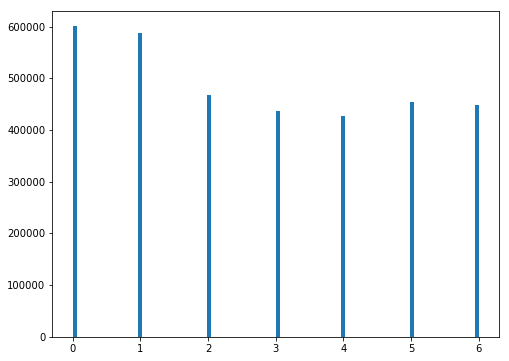

In [23]:
#plt.title(i)
pylab.figure(figsize=(8, 6))
plt.hist(orders.order_dow, bins=100)
plt.show()

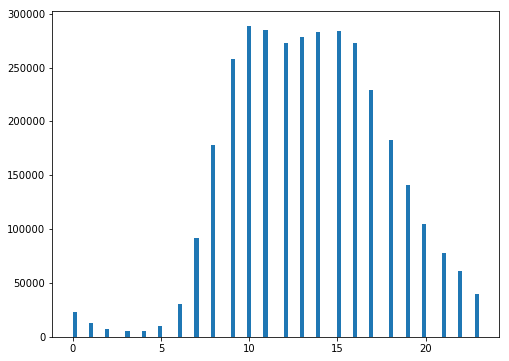

In [24]:
pylab.figure(figsize=(8, 6))
plt.hist(orders.order_hour_of_day, bins=100)
plt.show()

In [7]:
len(orders.user_id.unique())

206209